In [170]:
import uproot
from uproot_methods.classes import TLorentzVector
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import helpers

In [2]:
rtfile = uproot.open("/eos/cms/store/cmst3/group/hgcal/CMG_studies/kelong/GeantTruthStudy/SimClusterNtuples/test_ExactShoot5PartWPions_seed0_nano.root")

In [3]:
gen = rtfile["Events"].pandas.df(["GenPart*"], flatten=True)
genVtx = rtfile["Events"].pandas.df(["GenVtx*"], flatten=True)
tracking = rtfile["Events"].pandas.df(["Tracking*"], flatten=True)
calo = rtfile["Events"].pandas.df(["CaloParticle*"], flatten=True)

In [4]:
vtx_x = genVtx.GenVtx_x[0]
vtx_y = genVtx.GenVtx_y[0]
vtx_z = genVtx.GenVtx_z[0]
print(vtx_x, vtx_y, vtx_y)

4.5729394e-09 9.6843e-09 9.6843e-09


In [5]:
gen.GenPart_pt[0][0], gen.GenPart_eta[0][0]

(9.46875, -2.6015625)

In [65]:
import numpy as np
import math

In [193]:
from importlib import reload
reload(helpers)

<module 'helpers' from '/eos/home-k/kelong/SWAN_projects/MLRecoTruth/SimClusterValidation/helpers.py'>

In [51]:
simHitsHGCEE = rtfile["Events"].pandas.df(["SimHitHGCEE*"], flatten=True)
simHitsHGCHEfront = rtfile["Events"].pandas.df(["SimHitHGCHEfront*"], flatten=True)#, entrystart=start, entrystop=start+1)
simHitsHGCHEback = rtfile["Events"].pandas.df(["SimHitHGCHEback*"], flatten=True)#, entrystart=start, entrystop=start+1)
simClusters = rtfile["Events"].pandas.df(["SimCluster*"], flatten=True)
simHitsPixelEC = rtfile["Events"].pandas.df(["SimHitPixelEC*"], flatten=True)
simHitsPixel = rtfile["Events"].pandas.df(["SimHitPixelLowTof*"], flatten=True)
simHitsCSC = rtfile["Events"].pandas.df(["SimHitMuon*"], flatten=True)

In [7]:
colormap = {-1 : 'grey', 111 : "red", 211 : 'blue', 11 : 'green', 13 : 'orange', 22 : "lightblue", 
            2112 : "pink", }

In [7]:
evt = 3
endcap = "-"
pixelec = helpers.hitPositionArray(simHitsPixelEC, "SimHitPixelECLowTof", evt, endcap)
pixel = helpers.hitPositionArray(simHitsPixel, "SimHitPixelLowTof", evt, endcap)
muon = helpers.hitPositionArray(simHitsCSC, "SimHitMuonCSC", evt, endcap)

colors_ec = helpers.colorsFromIds(helpers.idFromHit(simHitsPixelEC, "SimHitPixelECLowTof", evt, endcap))
colors_pix = helpers.colorsFromIds(helpers.idFromHit(simHitsPixel, "SimHitPixelLowTof", evt, endcap))
colors_mu = helpers.colorsFromIds(helpers.idFromHit(simHitsCSC, "SimHitMuonCSC", evt, endcap))

if endcap == "-":
    calo = calo[calo.CaloParticle_eta < 0]
    tracking = tracking[tracking.TrackingParticle_eta < 0]
elif endcap == "+":
    tracking = tracking[tracking.TrackingParticle_eta < 0]
    calo = calo[calo.CaloParticle_eta > 0]

In [52]:
max(pixel[:,2])

119.01826477050781

In [77]:
helpers.hitIdsFromSimCluster(simHitsHGCEE,"SimHitHGCEE", simClusters, 0)

array([ 22.,  22.,  22., ..., -11., -11., -11.])

TypeError: vertex() takes from 3 to 4 positional arguments but 5 were given

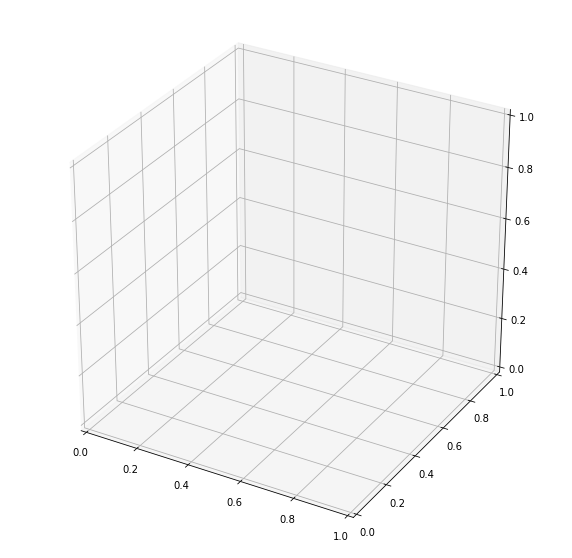

In [194]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')

genvtx = np.array([genVtx.GenVtx_x[evt], genVtx.GenVtx_y[evt], genVtx.GenVtx_z[evt]])

if False:
    for i in range(0, len(gen.GenPart_pdgId[evt])):
        charge = gen.GenPart_charge[evt][i]
        if (gen.GenPart_eta[evt][i] > 0 and endcap == "-") or (gen.GenPart_eta[evt][i] < 0 and endcap == "+"):
            continue
        pdgid = gen.GenPart_pdgId[evt][i]
        momentum = helpers.momentumVector(gen, "GenPart", evt, i)
        endz = 500 if momentum[2] > 0 else -500
        points = helpers.trajectory(genvtx, momentum, endz, charge)
        color = colormap[abs(pdgid)]
        ax.plot(points[:,2], points[:,0], points[:,1], c=color)

if True:
    for i in range(len(tracking.TrackingParticle_pt[evt])):
        if tracking.TrackingParticle_pt[evt].to_numpy()[i] < 1:
            continue
        vtx = helpers.vertex(tracking, "TrackingParticle", "Vtx", evt, i)
        decayvtx = helpers.vertex(tracking, "TrackingParticle", "DecayVtx", evt, i)
        mom = helpers.momentumVector(tracking, "TrackingParticle", evt, i)
        end = decayvtx[2] if decayvtx[2] < 10000 else (500 if mom[2] > 0 else -500)
        charge = tracking.TrackingParticle_charge[evt].to_numpy()[i]
        points = helpers.trajectory(vtx, mom, end, charge)
        pdgid = tracking.TrackingParticle_pdgId[evt].to_numpy()[i]
        ax.plot(points[:,2], points[:,0], points[:,1], color=helpers.colorsFromIds([pdgid])[0])

if False:
    for i in range(len(calo.CaloParticle_pt[evt])):
        mom = helpers.momentumVector(calo, "CaloParticle", evt, i)
        endz = 500 if mom[2] > 0 else -500
        charge = calo.CaloParticle_charge[evt].to_numpy()[i]
        points = helpers.trajectory(genvtx, mom, endz, charge)
        pdgid = calo.CaloParticle_pdgId[evt].to_numpy()[i]
        ax.scatter(points[:,2], points[:,0], points[:,1], marker='o', color=helpers.colorsFromIds([pdgid])[0], s=1)

simhitsEE = helpers.hitPositionArray(simHitsHGCEE, "SimHitHGCEE", evt, endcap)
simhitsHEfront = helpers.hitPositionArray(simHitsHGCHEfront, "SimHitHGCHEfront", evt, endcap)
simhitsHEback = helpers.hitPositionArray(simHitsHGCHEback, "SimHitHGCHEback", evt, endcap)

colorsee = helpers.colorsFromIds(helpers.hitIdsFromSimCluster(simHitsHGCEE, "SimHitHGCEE", simClusters, evt, endcap))
colorsfront = helpers.colorsFromIds(helpers.hitIdsFromSimCluster(simHitsHGCHEfront, "SimHitHGCHEfront", simClusters, evt, endcap))
colorsback = helpers.colorsFromIds(helpers.hitIdsFromSimCluster(simHitsHGCHEback, "SimHitHGCHEback", simClusters,evt, endcap))

ax.scatter(simhitsEE[:,2], simhitsEE[:,0], simhitsEE[:,1], marker='o', c=colorsee, s=1)
ax.scatter(simhitsHEfront[:,2], simhitsHEfront[:,0], simhitsHEfront[:,1], marker='o', c=colorsfront, s=1)
ax.scatter(simhitsHEback[:,2], simhitsHEback[:,0], simhitsHEback[:,1], marker='o', c=colorsback, s=1)
    
ax.scatter(pixel[:,2], pixel[:,0], pixel[:,1], marker='o', c=colors_pix, s=1)
ax.scatter(pixelec[:,2], pixelec[:,0], pixelec[:,1], marker='o', c=colors_ec, s=1)
ax.scatter(muon[:,2], muon[:,0], muon[:,1], marker='o', c=colors_mu, s=1)    
    
zlim = [-1000,500]
if endcap == "+":
    zlim = [0, 500]
elif endcap == "-":
    zlim = [-1000, 0]
ax.set_xlim3d(*zlim)
ax.set_ylim3d(-150,150)
ax.set_zlim3d(-150,150)
ax.set_xlabel('z pos')
ax.set_ylabel('x pos')
ax.set_zlabel('y pos')
fig.show()

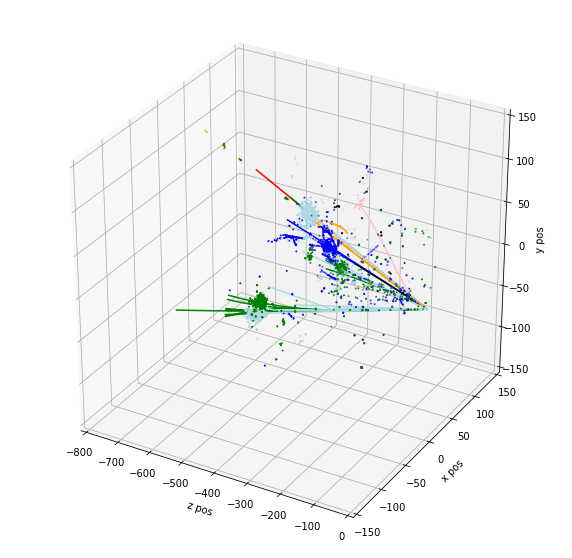

In [195]:
evt=9
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')

helpers.drawHits(ax, simHitsPixel, "SimHitPixelLowTof", evt, endcap)
helpers.drawHits(ax, simHitsPixelEC, "SimHitPixelECLowTof", evt, endcap)
helpers.drawHits(ax, simHitsCSC, "SimHitMuonCSC", evt, endcap)
helpers.drawHits(ax, simHitsHGCEE, "SimHitHGCEE", evt, endcap, simClusters)
helpers.drawHits(ax, simHitsHGCHEfront, "SimHitHGCHEfront", evt, endcap, simClusters)
helpers.drawHits(ax, simHitsHGCHEback, "SimHitHGCHEback", evt, endcap, simClusters)
helpers.drawGenParts(ax, gen, "GenPart", helpers.vertex(genVtx, "GenVtx", evt), evt, endcap)
helpers.drawTrackingParts(ax, tracking, "TrackingParticle", evt, endcap, 1)

zlim = [-800,500]
if endcap == "+":
    zlim = [0, 500]
elif endcap == "-":
    zlim = [-800, 0]
ax.set_xlim3d(*zlim)
ax.set_ylim3d(-150,150)
ax.set_zlim3d(-150,150)
ax.set_xlabel('z pos')
ax.set_ylabel('x pos')
ax.set_zlabel('y pos')
fig.show()

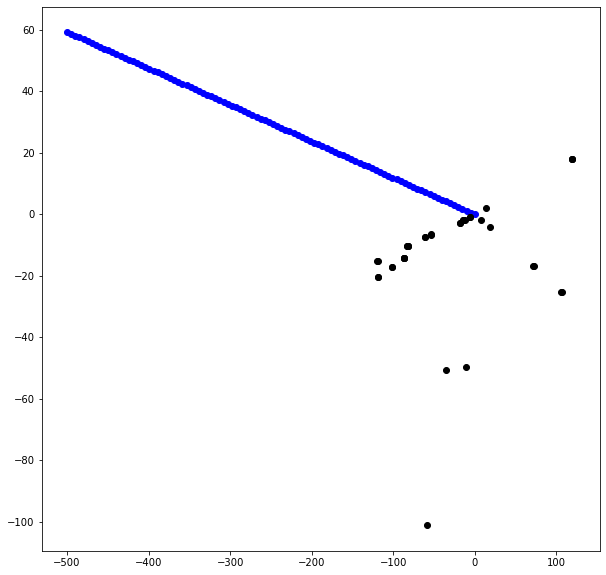

In [60]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.scatter(points[:,2], points[:,0], color='blue')
ax.scatter(pixel[:,2], pixel[:,0], color='black')

EndZ is -38.421875 s is  -395.0916602635369
start is -385.75
[  64.375    154.45312 -385.75   ] [ 174.5625    70.00781 -424.17188]


(-150, 150)

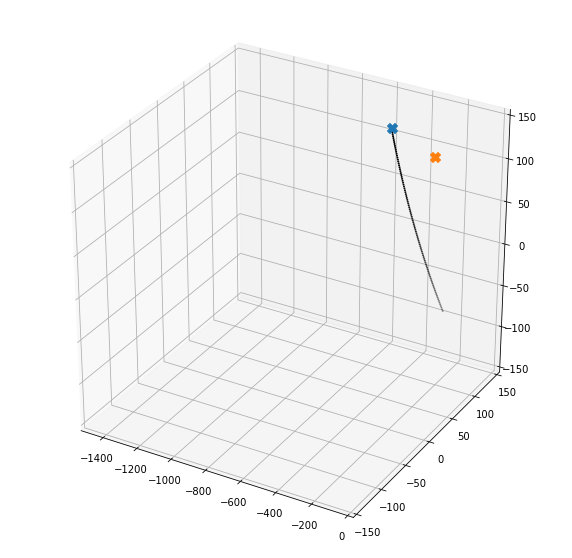

In [173]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
for i in [204]:#range(len(tracking.TrackingParticle_DecayVtx_t[evt])):
    if tracking.TrackingParticle_pt[evt].to_numpy()[i] < 5:
        continue
    vtx = helpers.vertex(tracking, "TrackingParticle", "Vtx", evt, i)
    mom = helpers.momentumVector(tracking, "TrackingParticle", evt, i)
    charge = tracking.TrackingParticle_charge[evt].to_numpy()[i]
    decayvtx = helpers.vertex(tracking, "TrackingParticle", "DecayVtx", evt, i)
    end = decayvtx[2] if decayvtx[2] < 10000 else (500 if mom[2] > 0 else -500)
    pdgid = tracking.TrackingParticle_pdgId[evt].to_numpy()[i]
    color = helpers.colorsFromIds([pdgid])[0]
    if color != 'black':
        continue
    points = helpers.trajectory(vtx, mom, end-vtx[2], charge)
    ax.scatter(points[:,2], points[:,0], points[:,1], marker='o', color=color, s=1)

if False:
    for i in range(0, len(gen.GenPart_pdgId[evt])):
        charge = gen.GenPart_charge[evt][i]
        if (gen.GenPart_eta[evt][i] > 0 and endcap == "-") or (gen.GenPart_eta[evt][i] < 0 and endcap == "+"):
            continue
        pdgid = gen.GenPart_pdgId[evt][i]
        momentum = helpers.momentumVector(gen, "GenPart", evt, i)
        endz = 500 if momentum[2] > 0 else -500
        points = helpers.trajectory(genvtx, momentum, endz, charge)
        color = colormap[abs(pdgid)]

        ax.plot(points[:,2], points[:,0], points[:,1], c=color)
    
decayvtx = helpers.vertex(tracking, "TrackingParticle", "DecayVtx", evt, i)
print(vtx, decayvtx)
ax.scatter([vtx[2]], [vtx[0]], [vtx[1]], marker='X', s=100)
ax.scatter([decayvtx[2]], [decayvtx[0]], [decayvtx[1]], marker='X', s=100)
ax.set_xlim3d(-1500, 0)
ax.set_ylim3d(-150,150)
ax.set_zlim3d(-150,150)

In [132]:
print(vtx, decayvtx)

[  64.375    154.45312 -385.75   ] [ 174.5625    70.00781 -424.17188]


EndZ is -424.17188 s is  43.705537477531024
start is -385.75
-385.75 -424.17188


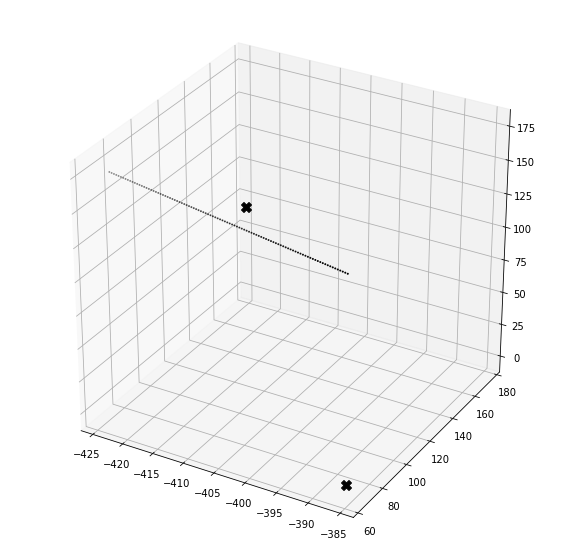

In [178]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
tracking.TrackingParticle_Vtx_x[evt].to_numpy()[0]
end = decayvtx[2] if decayvtx[2] < 10000 else (500 if mom[2] > 0 else -500)
points = helpers.trajectory(vtx, mom, end, charge)
ax.scatter(points[:,2], points[:,0], points[:,1], marker='o', color=color, s=1)
ax.scatter([decayvtx[2]], [decayvtx[0]], [decayvtx[1]], marker='X', color=color, s=100)
ax.scatter([vtx[2]], [vtx[0]], marker='X', color=color, s=100)

print(vtx[2], end)

array([  1.51405783,   5.96608587, -11.35297001])

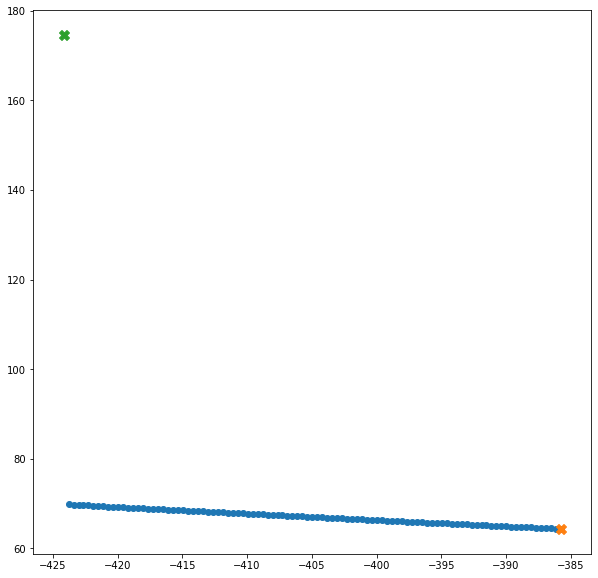

In [182]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
ax.scatter(points[:,2], points[:,0])
ax.scatter([vtx[2]], [vtx[0]], marker='X', s=100)
ax.scatter([decayvtx[2]], [decayvtx[0]], marker='X', s=100)
mom

In [167]:
points = helpers.trajectory(vtx, mom, end, charge)

EndZ is -424.34375 s is  0.19504694080965282
start is -424.17188


In [151]:
for i in range(10): print(i)

0
1
2
3
4
5
6
7
8
9
